
# 2da entrega de problemas computacionales

## Alumna: Maria Sol Vidal

### Problema 1: Método  Monte Carlo
 

**(1)**  Utilizando el resultado del problema 5 de la guía 3, genere con la computadora 10000 números al azar que sigan la
distribución de Cauchy a partir de una uniforme [0,1]. Presente los datos en un histograma y grafique
sobre éstos la predicción teórica.

In [276]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import scipy as sp 
from scipy import stats
import pandas as pd

En el ejercicio 5 de la guía 3 habiamos visto que si $\Theta$ era una variable aleatoria con distribución uniforme en  $[-\frac{\pi }{2},\frac{\pi }{2}]$, entonces la variable aleatoria $Y=tan(\Theta)$ tenia una distribución de probabilidad de Cauchy (estándar). Es decir:

$\Theta \sim Unif[-\frac{\pi }{2},\frac{\pi }{2}] \hspace{1cm} \rightarrow \hspace{1cm} Y=tan(\Theta )\sim Cauchy$ $ \hspace{1cm} \rightarrow \hspace{1cm} f_Y=\frac{1}{\pi (1+x^{2})}$


Primero de todo me genero una muestra de 10000 números al azar de la distribución uniforme en $[-\frac{\pi }{2},\frac{\pi }{2}]$ a partir de una uniforme en $[0,1]$.

In [277]:
unif=[]
for i in range (10000): # muestra de 10000
    unif.append(np.pi * np.random.random_sample() - (np.pi/2))

Usando el resultado del ejercicio 5 de la guía 3, me genero una muestra de 10000 números que siguen una distribución de Cauchy estándar a partir de aplicarle la tangente a la muestra de la distribución uniforme en $[-\frac{\pi }{2},\frac{\pi }{2}]$.

In [278]:
cauchy=[]
for i in unif:
    cauchy.append(np.tan(i))

Ahora con esto puedo realizar el histograma de los 10000 resultados obtenidos y lo comparo con la densidad de probabilidad teórica, es decir, una distribución de Cauchy estándar. 

Antes de presentar el histograma, explico brevemente con qué criterio determiné las barras de error. Para estimar el error en las alturas de las barras de los histogramas voy a usar la desviación estándar de la distribución correspondiente al número de datos en una determinada clase (bin) de un histograma. En concreto, el error que le asigno a un bin es $\sigma=\sqrt{n_i}$ , donde $n_i$ es el número de entradas en el bin i-ésimo. Esto asume que el número de de datos que caen en un determinado bin es una variable aleatoria con distribución poissoneana, donde se aproximo $\mu$ por el valor de $n_i$ medido, es decir:



$\mu \sim n_i \hspace{1cm} \rightarrow \hspace{1cm} \sigma=\sqrt{\mu}\sim \sqrt{n_i}$


Esta elección puede justificarse de la siguiente manera: la variable aleatoria ¨número de de datos que caen en un determinado bin¨ puede ser pensada como poissoneana, siempre y cuando el número de datos del histograma sea alto (número de intentos grande), y la probabilidad de caer en un determinado bin sea baja (probabilidad de éxito tendiendo a cero). Para esto último, también necesito que el número de bines sea relativamente alto, asi efectivamente si hay muchos bines, la probabilidad de caer en uno determinado es muy baja. 

Esto es equivalente a  pensar a la distribución de la variable aleatoria ¨número de de datos que caen en un determinado bin¨ como una binomial, en un cierto límite. El $éxito$ corresponde a que un dato caiga en un bin en particular. El fracaso corresponde a que un dato caiga en cualquier otro bin que no sea en el que estamos interesados. Cada $tirada$ $de$ $la$ $moneda$ es un dato del histograma que cae o no cae en el bin en cuestión y las $tiradas$ son independientes entre sí. 
Por otro lado, el número de intentos n de la binomial es el número de datos del histograma. Además, la probabilidad de éxito $p$ la calcularía como el número de datos que cayeron en el bin en mi histograma sobre el número total de datos del histograma N. Con eso dicho, el error de un determinado bin sería $\sigma=\sqrt{ np(1-p)}$. Ahora: si estamos en el caso anteriormente mencionado, número de datos alto $n\rightarrow\infty$ y probabilidad de caer en un dado bin muy baja $p\rightarrow 0$, estamos en el límite donde la binomial tiende a una Poisson. Dicho esto, en conclusión, el error que le asigno a la altura de un bin es el de la poissoneana $\sigma=\sqrt\mu\sim\sqrt n_i$, donde  aproximo a $\mu$ por $n_i$, es decir, el número de datos que cayó en el bin en mi histograma.

In [304]:
def plot_histogram(data, bins, ticks=5, xlabel='X', ylabel='Histograma', density=True, ecolor='', ax = None):
    N = len(data)
    num_bins = len(bins)
    xmin = min(bins)
    xmax = max(bins)
    
    
    if ax is None:
        ax = plt.gca()
    
    hist, _ = np.histogram(data, bins=bins, density=density)
    
    normed = N if density else 1
    error =  np.sqrt(hist / normed)  
    
    plt.bar(x=bins[:-1], height=hist, width=np.diff(bins), yerr=error, edgecolor='black', ecolor="red", capsize=2)

    plt.xticks(np.linspace(0, num_bins - 2, ticks), np.linspace(xmin, xmax, ticks), rotation='horizontal');
    plt.xlabel(xlabel);
    return ax

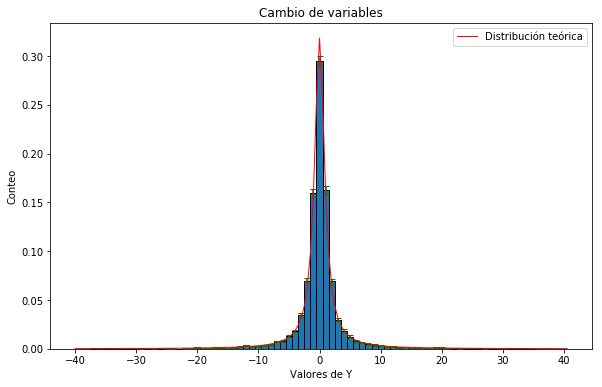

In [279]:
plt.figure(figsize=(9.7,6))
hist, edge = np.histogram(cauchy, bins=np.arange(-37-0.5,37-0.5,1))


error =  np.sqrt(hist)  
bins=np.arange(-37,37,1)
plt.bar(x=edge[:-1], align="edge",height=hist/10000, width=np.diff(bins), yerr=error/10000, edgecolor='black', ecolor="g", capsize=3)
t = np.arange(-40,41,0.5)
p=sp.stats.cauchy.pdf(t)

plt.plot(t,p ,'r-', linewidth=1, label="Distribución teórica") 
 
plt.title('Cambio de variables')
plt.xlabel('Valores de Y')
plt.ylabel('Conteo')
plt.legend(loc = 'best') 
plt.show()

Lo que se puede observar es que la distribución teórica (Cauchy estándar) se asemeja a la obtenida, aunque no es perfectamente idéntica. Esto es de esperar, ya que en promedio espero que la cantidad de barras del histograma (con su barra de error) que se solapan con la curva teórica esté alrededor del 68% aproximadamente. Es decir, es muy improbable que el histograma se solape por completo con la curva teórica. Dicho esto, puedo decir que los datos obtenidos no contradicen la hipótesis de que los valores de la variable aleatoria $Y$ provienen de una distribución de Cauchy estándar. 

**(2)** Repita el ítem anterior pero ahora usando el Método Monte Carlo (conocido como aceptación-rechazo).

Para generar números pseudoaleatorios con una distribución arbitraria f(t), en un
dominio [a, b] en el que f está acotada (siendo $f_m$ su valor máximo) se puede proceder de la siguiente manera:

I. Se generan dos números al azar y y z con distribución uniforme en [0, 1].

II. A partir de y y z se determinan u = a + (b − a)y y v = $f_m$z.

III. Si v ≤ f(u), se incluye x = u en la muestra de números generados, en otro caso se descarta.

IV. Se repiten los pasos I-III hasta obtener la cantidad deseada de números aceptados.

En nuestro caso, la distribución f(t) es la de Cauchy $f=\frac{1}{\pi (1+x^{2})}$, por lo que $a \rightarrow -\infty$ y $b \rightarrow \infty$. Para hacer el método Monte Carlo voy a $truncar$ el dominio de la distribución de Cauchy en a=-1000 y b=1000, para los cuales $P(t< -100)=P(t>100)=0.00031$. Por otra parte, $f_m$ para la Cauchy es el valor de f(t=0)=0.318, su valor máximo. Aclarado esto, voy a seguir el algoritmo propuesto en la consigna. 

In [280]:
sp.stats.cauchy.cdf(-1000)
#1-sp.stats.cauchy.cdf(1000)

0.0003183097800805168

In [281]:
def montecarlo(ygriega,zeta):
    def f(x): return sp.stats.cauchy.pdf(x)
    max_x = 0.3183098861837907 # valor de la cauchy en cero 
    a=-1000 # a y b no son cualquier cosa, es el rango de la f, aca como la Cauchy es infinit
    b=1000
    u= a + (b-a)*ygriega #se mueve entre [a,b]
    v=max_x*zeta
    if v<=f(u):
        return u 
    else:
        pass


Ahora voy a repetir el algoritmo 800000 veces, generando en cada corrida nuevos números aleatorios $y$ y $z$, provenientes de una distribución uniforme [0,1]. 

In [282]:
fin=[]
for i in range(800000):
    y=np.random.random_sample()
    z=np.random.random_sample()
    fin.append(montecarlo(y,z))
    

In [283]:
final=list(filter(None.__ne__, fin)) #filtro las corridas en donde no se cumplio v ≤ f(u)

Ahora con esto puedo realizar el histograma de los valores obtenidos de u y lo comparo con la densidad de probabilidad teórica, es decir, una distribución de Cauchy estándar. 

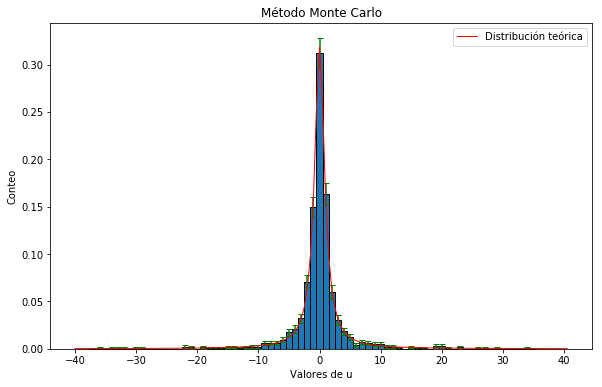

In [284]:
plt.figure(figsize=(9.7,6))
hist, edge = np.histogram(final, bins=np.arange(-37-0.5,37-0.5,1))


error =  np.sqrt(hist)  
bins=np.arange(-37,37,1)
plt.bar(x=edge[:-1], align="edge",height=hist/len(final) , width=np.diff(bins), yerr=error/len(final) , edgecolor='black', ecolor="g", capsize=3)
t = np.arange(-40,41,0.5)
p=sp.stats.cauchy.pdf(t)
plt.plot(t,p ,'r-', linewidth=1, label="Distribución teórica") 
 
plt.title('Método Monte Carlo')
plt.xlabel('Valores de u')
plt.ylabel('Conteo')
plt.legend(loc = 'best') 
plt.show()

Nuevamente se puede observar es que la distribución teórica (Cauchy estándar) se asemeja a la obtenida, aunque no es perfectamente idéntica. De nuevo, esto es de esperar, ya que en promedio espero que la cantidad de barras del histograma (con su barra de error) que se solapan con la curva teórica esté alrededor del 68% aproximadamente.  

**(3)** Discuta los pros y contras de cada método.

Por un lado, si se utiliza cambio de variables para generarse números pseudoaleatorios con una distribución arbitraria $Y\sim f(t)$ a partir de números $\Theta$ con cierta distribución (en este caso, a partir de números con distribución uniforme en [0,1]), tengo que saber qué función tengo que aplicarle a $\Theta$ para obtener una variable aleatoria $Y$ con distribución $f(t)$. Es decir, tengo que saber que cambio de variables realizar para obtener la función de distribución $f(t)$ querida. Esto es equivalente a conseguir, dicho mal y pronto, ¨la inversa de la primitiva de la $f(t)$¨, que para distribuciones arbitrarias puede ser muy complicado de obtener, o directamente puede no existir la primitiva en forma analítica de $f(t)$. En cambio, si se utiliza el método de Monte Carlo para conseguirse números aleatorios con distribución $f(t)$ no se tiene este problema. La distribución $f(t)$ puede ser cualquier cosa, incluso una función no analítica, y aún asi puedo usar el método Monte Carlo sin problemas. Sólo necesito los valores de $f(t)$ en el dominio [a,b] donde vaya a realizar el algoritmo. 

Sin embargo, el método Monte Carlo tiene mayor costo computacional que aplicar cambio de variables para conseguirse una muestra de la distribución $f(t)$. El tiempo que tarda en correr el algoritmo de Monte Carlo es considerablemente mayor que el de cambio de variables. Sin embargo, si una sola vez me genero números aleatorios con distribución $f(t)$ usando el método Monte Carlo, puedo guardarlos y reutilizarlos en futuras ocasiones. 



### Problema 2: Cuadrados mínimos y banda de error

**(1)** Encuentre, con su error, los parámetros de la recta que mejor ajusta los siguientes
datos, con $\sigma$ = 0,3. Grafique los datos, con su error, y la recta obtenida para
$0 ≤ x ≤ 5$. (Rta: $ \hat{a_1}=1,452 ± 0,721$ y $\hat{a_2}=0,799 ± 0,286$)


En primer lugar, los datos son:

In [285]:
x=np.array([2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3])
y=np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])
sigma=0.3 #error de los yi, los xi no tienen error
N=len(y) #nro. de datos

Tengo N=11 mediciones del par $(x_i,y_i)$, donde los $y_i$ son independientes y todos tienen el mismo error $\sigma=0.3$, es decir, Cov($y_i,y_j$)=$\delta _{ij}\sigma^2$. Además, en este caso, los $x_i$ están medidos con perfecta precisión, es decir, no son variables aleatorias. Dadas estas condiciones, los parámetros de la recta $y=a_1+a_2x$ que mejor ajusta los datos surgen de minimizar la suma $S_N=\sum ^{N}_{i=1}[y_i-(a_1+a_2x_i)]^{2}$, obteniendose la conocida formula de cuadrados mínimos:

$\hat{a_1}=\frac{\sum x_i^{2}\sum y_i-\sum x_i\sum x_iy_i}{\Delta }$

$\hat{a_2}=\frac{N\sum x_iy_i-\sum x_i\sum y_i}{\Delta }$

donde $\Delta =N\sum x_i^{2}-(\sum x_i)^{2}$. 

Dicho esto, utilizando la fórmula de propagación de errores para el caso de variables $y_i$ independientes (Cov($y_i,y_j$)=$\delta _{ij}\sigma^2$):

$Cov(a_j,a_k)=\sum ^{2}_{i=1}\frac{\partial a_j}{\partial y_i}\frac{\partial a_k}{\partial y_i}\sigma _{i}^{2}$

se llega a la siguiente matriz de covarianza para $\hat{a_1}$ y $\hat{a_2}$:

$Cov(\hat{a_j},\hat{a_k})=\frac{\sigma ^{2}}{\Delta }
\begin{pmatrix}
\sum x_i^{2} & -\sum x_i \\ 
-\sum x_i & N 
\end{pmatrix}$

Como la matriz de covarianza no es diagonal, $\hat{a_1}$ y $\hat{a_2}$ no son independientes. Tienen una correlación igual a $Cov(\hat{a_1},\hat{a_2})= -\sum x_i=-N\bar{x}$. Si el promedio de los datos $x_i$ es positivo, la correlación entre $\hat{a_1}$ y $\hat{a_2}$ es negativa. Y hay un solo caso donde no están correlacionadas: cuando el promedio da cero.

Dicho esto, voy a utilizar la fórmula cerrada para calcular la pendiente $\hat{a_2}$ y ordenada al origen $\hat{a_1}$ que sale de minimizar cuadrados mínimos. Lo mismo para calcular sus errores.

In [286]:
#y=a1+a2x
delta=N*sum(x**2)-(sum(x))**2
a1=(sum(x**2)*sum(y)-sum(x)*sum(x*y))/delta
a2=(N*sum(x*y)-sum(x)*sum(y))/delta

print(" La ordenada al origen arrojada por el ajuste es a1={} y la pendiente a2={} ".format(a1, a2)) 

 La ordenada al origen arrojada por el ajuste es a1=1.4522727272727187 y la pendiente a2=0.7990909090909231 


Por lo tanto, la ordenada al origen arrojada por el ajuste es $ \hat{a_1}$=1.452  y la pendiente $ \hat{a_2}$=0.799, como pedía demostrar el enunciado. 

Faltan calcular los errores de $ \hat{a_1}$ y $\hat{a_2}$. Para eso uso el resultado para la $Cov(\hat{a_j},\hat{a_k})$, anteriormente mencionado. 

In [287]:
Cov=((sigma**2)/delta)*np.array([sum(x**2),-sum(x),-sum(x),N])
Cov=np.reshape(Cov,(2,2)) #matriz de covarianza de 2x2 
a=Cov[0,0] #varianza de a1
b=Cov[1,1] # varianza de a2 
c=Cov[0,1] # covarianza entre a1 y a2
print(" La ordenada al origen arrojada por el ajuste es a1={}+/- {} y la pendiente a2={} +/- {} ".format(a1, a**(1/2),a2,b**(1/2))) 

 La ordenada al origen arrojada por el ajuste es a1=1.4522727272727187+/- 0.7207950156219578 y la pendiente a2=0.7990909090909231 +/- 0.2860387767736788 


En conlcusión, la ordenada al origen arrojada por el ajuste es $\hat{a_1}=1.452 ± 0,721$ y la pendiente $\hat{a_2}=0.799 ± 0,286$, que es lo que decía el enunciado.

Dicho esto, ahora voy a graficar los datos $(x_i,y_i)$ con su error y la recta obtenida para $0 ≤ x ≤ 5$.

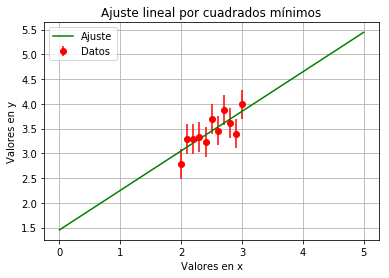

In [288]:
t = np.linspace(0, 5, 1000) #eje x 
plt.plot(t, a1+a2*t, 'g-', label = 'Ajuste') 
plt.errorbar(x, y, yerr=sigma, fmt='ro', label="Datos")

# Detalles del gráfico
plt.grid(True) 
plt.title('Ajuste lineal por cuadrados mínimos')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best') 

plt.show()


**(2)** A partir de esta recta prediga, con su error, el valor esperado $y_a$ para un cierto $x_a$. No
olvide usar la matriz de covarianza completa. Grafique $y_a(x_a)$, y agréguelo al gráfico
anterior en forma de banda de error. Encuentre qué valor de $x_a$ minimiza el error de $y_a$,
e interprete la magnitud de este valor mínimo. Discuta por qué el error aumenta para
valores de $x_a$ alejados de la región donde se hicieron las mediciones.

El valor esperado $y_a$ para un cierto $x_a$ se calcula como $y_a=\hat{a_1}+\hat{a_2}x_a$, donde por el inciso anterior $\hat{a_1}=1.452$ y $\hat{a_2}=0.799$. Ahora para estimar el error de $y_a$, voy a calcular su error mediante propagación de errores como:

$y_{a}=\hat{a_1}+\hat{a_2}x_a$

$Var(y_a)=\left ( \frac{\partial y_a}{\partial a_1} \right )^{2}Var(a_1)+ \left ( \frac{\partial y_a}{\partial a_2} \right )^{2}Var(a_2)+ 2\frac{\partial y_a}{\partial a_1}\frac{\partial y_a}{\partial a_2}Cov(a1,a2)$

In [289]:
def var_ya (xa):
    return a+(xa**2)*b+2*xa*c
errory=[]
t = list(np.linspace(0, 5, 1000))
for i in t:
    errory.append((var_ya(i)**(1/2)))

Agrego al gráfico anterior $y_a ± \sigma_a = y_a ± \sqrt{Var(y_a)}$, en forma de banda de error. 

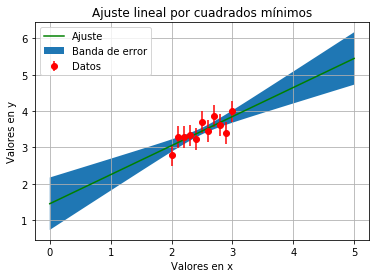

In [290]:
t = np.linspace(0, 5, 1000) 
plt.plot(t, a1+a2*t, 'g-', label = 'Ajuste') 
plt.errorbar(x, y,yerr=sigma, fmt='ro', label="Datos")
plt.fill_between(t, y1=a1+a2*t+errory, y2=a1+a2*t-errory,label= 'Banda de error')

# Detalles del gráfico
plt.grid(True) # Para que quede en hoja cuadriculada
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.title('Ajuste lineal por cuadrados mínimos')
plt.legend(loc = 'best') 

plt.show()

Para ver qué valor de $x_a$ minimiza el error de $y_a$ recurro a la fórmula para la varianza de $y_a$:

$y_{a}=a_1+a_2x_a$

$Var(y_a)=\left ( \frac{\partial y_a}{\partial a_1} \right )^{2}Var(a_1)+ \left ( \frac{\partial y_a}{\partial a_2} \right )^{2}Var(a_2)+ 2\frac{\partial y_a}{\partial a_1}\frac{\partial y_a}{\partial a_2}Cov(a_1,a_2)$

Remplazo los valores de $Var(a_1)$, $Var(a_2)$ y $Cov(a_1,a_2)$ que calculé en $Cov(\hat{a_j},\hat{a_k})$, y las derivadas $\frac{\partial y_a}{\partial a_1}=1$ y $\frac{\partial y_a}{\partial a_2}=x_a$. 

$Var(y_a)=Var(a_1)+ x_{a}^{2}Var(a_2)+ 2x_{a}Cov(a_1,a_2)$

$Var(y_a)=\frac {\sigma^{2}}{\Delta}\sum x_i^{2} + x_{a}^{2}N-2x_{a} \sum x_i$ $\hspace{1cm} \rightarrow \hspace{1cm}$ cuadrática en $x_{a}$

$\frac{\partial Var(y_{a})}{\partial x_{a}}=0$ $\hspace{1cm} \rightarrow \hspace{1cm}$  $x_{a}^{*}=\frac{\sum x_{i}}{N}=\bar{x}=-NCov(\hat{a_1},\hat{a_1})$

El promedio de los $x_i$ es el valor de $x_a$ que minimiza el error de $y_a$. Se puede ver esto graficamente, a partir de la banda de error. Además, puedo ver si esto ocurre realmente en mis datos:

In [291]:
xa = list(np.linspace(0, 5, 1000)) #valores de xa
xa=np.asarray(xa)
errory=np.asarray(errory) #error de ya

xmin=t[errory<=min(errory)] #elijo el xa donde el error de ya es minimo 
xmedio=np.mean(x)

print(" El valor de xa (entre 0 y 5) que minimiza el error de ya es {}. Por otro lado, el promedio de mis datos (xi) es {}  ".format(xmin, xmedio))

 El valor de xa (entre 0 y 5) que minimiza el error de ya es [2.4974975 2.5025025]. Por otro lado, el promedio de mis datos (xi) es 2.5  


Efectivamente en mis datos el valor de $x_a$ que minimiza el error de $y_a$ es el promedio de los $x_i$, $\bar{x}=2.5$.

Los $x_a$ más alejados de la zona donde se realizaron las mediciones son más sensibles a fluctuaciones, es decir, los errores aumentan para valores de $x_a$ alejados de la zona donde se tomaron datos. Esto es así porque $a_1$ y $a_2$ están correlacionados, $Cov(a_1,a_2)=-\sum x_i=-N\bar{x}<0$, ya que $\bar{x}=2.5$. Al tener una correlación negativa, cuando la ordenada al origen $a_1$ aumenta, la pendiente de la recta $a_2$ disminuye. Dicho de otra manera, el valor de $a_1$ no es independiente del de $a_2$. El valor de $a_1$ de cierta manera limita los valores que puede tomar $a_2$, ya que estos están sujetos a ajustar los datos (x_i,y_i). Esta restricción no está en los $x_a$  donde no hay datos, por lo que es por esa misma razón que éstos son los que tienen más error. Dicho esto, los valores de $a_1$ y $a_2$ se elijen tal que se ajusten los datos, pero en el resto de las zonas no hay tal restricción. Esto se puede visualizar como que $a_1$ y $a_2$ están correlacionados para ajustar a los datos, es decir, se elijen con los datos como $punto$ $fijo$ y puede $pivotear$ en las zonas donde no hay datos, por lo que en las zonas alejadas devlos datos naturalmente van a tener más error. 



**(3)** Grafique la banda de error que obtiene si ignora el término de correlación en la propagación de errores y discuta por qué ésta es claramente errónea.

Ahora me piden estimar el error de $y_a$, pero olvidándome el término de correlación es decir:

$y_{a}=\hat{a_1}+\hat{a_2}x_a$

$Var(y_a)=\left ( \frac{\partial y_a}{\partial a_1} \right )^{2}Var(a_1)+ \left ( \frac{\partial y_a}{\partial a_2} \right )^{2}Var(a_2)$

In [292]:
def var_ya_mal (xa):
    return a+(xa**2)*b
errory_mal=[]
t = list(np.linspace(0, 5, 1000))
for i in t:
    errory_mal.append((var_ya_mal(i)**(1/2)))


Grafico la banda de error que obtuve si ignoro el término de correlación en la propagación de errores.

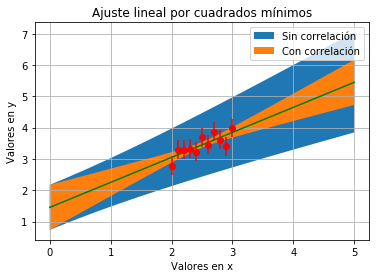

In [293]:
t = np.linspace(0, 5, 1000) 
plt.plot(t, a1+a2*t, 'g-') 

plt.errorbar(x, y,yerr=sigma, fmt='ro')
plt.fill_between(t, y1=a1+a2*t+errory_mal, y2=a1+a2*t-errory_mal, label = 'Sin correlación')
plt.fill_between(t, y1=a1+a2*t+errory, y2=a1+a2*t-errory,label = 'Con correlación')

# Detalles del gráfico
plt.grid(True) 
plt.title('Ajuste lineal por cuadrados mínimos')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best') 

plt.show()

No considerar el término de correlación en la propagación de errores de $y_a$ es erróneo, porque de esa forma sobreestimo el error, como se puede ver en la figura de arriba. La covarianza entre  $a_1$ y  $a_2$ es negativa, por lo que me achica el error. Por otra parte, ésta acota los valores que puede tomar  $a_1$ para un dado  $a_2$. Esto lo veo intuitivamente viendo que si aumenta la pendiente disminuye la ordenada, ya que la correlación entre $a_1$ y  $a_2$ es negativa. Es decir, el valor que toma $a_1$  no es independiente del valor que toma $a_2$. Si no considero la correlación entre $a_1$ y  $a_2$, éstos pueden tomar cualquier valor libremente, en particular los extremos de la banda de error, lo cual manda la recta para cualquier lado, sin ajustar bien a los datos. 

**(4)** Verifique los resultados analíticos obtenidos en el ítem 2 escribiendo un programa que
realice la siguiente simulación numérica:

a) para cada $x_i$ genere al azar un $y_i$ de la distribución gaussiana $N(\hat{a_1}+\hat{a_2}x_i
, \sigma)$.

b) ajuste una recta a los $(x_i, y_i)$ generados, y prediga el valor $y_a$ para $x_a$ = 0,5.

Repita 1000 veces los pasos 4a–4b, construyendo un histograma con los valores de
$y_a$, y dibuje sobre éste la gaussiana con el valor esperado y el error de ya calculado
teoricamente en 2. (Lo hago con 10000 corridas porque con 1000 se ve feo ).

Procedo a realizar el algoritmo propuesto. 

In [305]:
ya=[]
for i in range(10000): #Lo hago con 10000 porque con 1000 se ve feo 
    yi=[]
    for i in x:
        yi.append(np.random.normal(1.452 +0.799*i,0.3))
    a1=(sum(x**2)*sum(yi)-sum(x)*sum(x*yi))/delta
    a2=(N*sum(x*yi)-sum(x)*sum(yi))/delta
    ya.append(a1+a2*0.5)


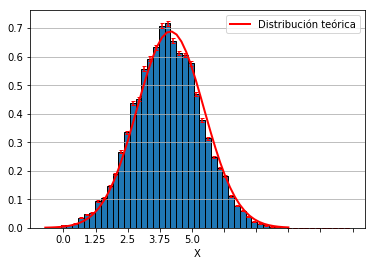

In [315]:
plot_histogram(ya, np.linspace(0, 5, 51))
t = np.linspace(min(ya), max(ya), 51)
p=sp.stats.norm.pdf(t,1.452 +0.799*0.5,(var_ya(0.5))**(1/2))
plt.plot(t, p ,'r-', linewidth=2, label="Distribución teórica") 
plt.grid(True, axis='y')
plt.xticks(np.linspace(0, 5, 10))
plt.legend(loc = 'best') 
plt.show()

Nuevamente se puede observar es que la distribución teórica (gaussiana) se asemeja a la obtenida, aunque no es perfectamente idéntica. De nuevo, esto es de esperar, ya que en promedio espero que la cantidad de barras del histograma (con su barra de error) que se solapan con la curva teórica esté alrededor del 68% aproximadamente.